In [1]:
# STEP 1: Install Required Libraries
!pip install pandas numpy matplotlib seaborn scikit-learn xgboost -q

print("✅ Libraries installed successfully!")

✅ Libraries installed successfully!


In [2]:
# STEP 2: Import All Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


In [4]:
# STEP 3: Load Wine Quality Dataset
print("="*80)
print("LOADING WINE QUALITY DATASET")
print("="*80)

# Upload your dataset file
from google.colab import files
import io

print("📁 Please upload your wine quality dataset file (CSV format):")
uploaded = files.upload()

# Get filename
filename = list(uploaded.keys())[0]
print(f"📂 Uploaded: {filename}")

# Load the dataset
try:
    # Try with semicolon separator (common for wine dataset)
    wine_df = pd.read_csv(io.BytesIO(uploaded[filename]), sep=';')
    print("✅ Dataset loaded with semicolon separator!")
except:
    # Try with comma separator
    wine_df = pd.read_csv(io.BytesIO(uploaded[filename]))
    print("✅ Dataset loaded with comma separator!")

print(f"\n📊 Dataset Information:")
print(f"Shape: {wine_df.shape}")
print(f"Columns: {list(wine_df.columns)}")
print("\nFirst 5 rows:")
display(wine_df.head())

print("\nDataset Info:")
wine_df.info()

LOADING WINE QUALITY DATASET
📁 Please upload your wine quality dataset file (CSV format):


Saving WineQT.csv to WineQT.csv
📂 Uploaded: WineQT.csv
✅ Dataset loaded with semicolon separator!

📊 Dataset Information:
Shape: (1143, 1)
Columns: ['fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id']

First 5 rows:


,"fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id"
0,"7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0...."
1,"7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.2,0...."
2,"7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0..."
3,"11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,..."
4,"7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0...."



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 1 columns):
 #   Column                                                                                                                                                Non-Null Count  Dtype 
---  ------                                                                                                                                                --------------  ----- 
 0   fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id  1143 non-null   object
dtypes: object(1)
memory usage: 9.1+ KB


In [5]:
# STEP 4: Data Cleaning & Preparation
print("\n" + "="*80)
print("DATA CLEANING & PREPARATION")
print("="*80)

# 4.1 Check for missing values
print("🔍 Checking for missing values...")
missing_values = wine_df.isnull().sum()
if missing_values.sum() == 0:
    print("✅ No missing values found!")
else:
    print(f"Missing values found:")
    print(missing_values[missing_values > 0])
    # Fill missing values
    wine_df = wine_df.fillna(wine_df.median())
    print("✅ Missing values filled with median!")

# 4.2 Check for duplicates
print(f"\n🔍 Checking for duplicates...")
duplicates = wine_df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")
if duplicates > 0:
    wine_df = wine_df.drop_duplicates()
    print(f"✅ Duplicates removed! New shape: {wine_df.shape}")

# 4.3 Check column names (standardize)
print("\n📝 Standardizing column names...")
# Remove spaces and lowercase
wine_df.columns = wine_df.columns.str.replace(' ', '_').str.lower()
print(f"Updated column names: {list(wine_df.columns)}")

# 4.4 Statistical summary
print("\n📊 Statistical Summary:")
display(wine_df.describe().round(2))

print("✅ Step 4: Data cleaning completed!")


DATA CLEANING & PREPARATION
🔍 Checking for missing values...
✅ No missing values found!

🔍 Checking for duplicates...
Duplicate rows: 0

📝 Standardizing column names...
Updated column names: ['fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,id']

📊 Statistical Summary:


,"fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,id"
count,1143
unique,1143
top,"5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.995470000..."
freq,1


✅ Step 4: Data cleaning completed!


In [7]:
# STEP 5: FIXED - Handle single column dataset
print("\n" + "="*80)
print("WINE QUALITY DISTRIBUTION ANALYSIS - FIXED VERSION")
print("="*80)

# Check if dataset has only 1 column (all data in one column)
if wine_df.shape[1] == 1:
    print("⚠️ Dataset has only 1 column. Splitting into multiple columns...")

    # Get the column name
    single_col = wine_df.columns[0]
    print(f"Single column name: '{single_col}'")

    # Split the column by comma
    split_data = wine_df[single_col].str.split(',', expand=True)

    # Try to identify header row
    first_row = split_data.iloc[0].tolist()

    # Check if first row contains header names
    if any('fixed' in str(x).lower() for x in first_row) or any('alcohol' in str(x).lower() for x in first_row):
        print("First row appears to be headers. Using as column names...")
        # Use first row as column names
        wine_df = split_data.iloc[1:].reset_index(drop=True)
        wine_df.columns = first_row
    else:
        print("No headers found. Creating default column names...")
        # Create default column names for wine dataset
        default_columns = [
            'fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
            'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
            'pH', 'sulphates', 'alcohol', 'quality', 'id'  # Common wine dataset columns
        ]
        wine_df = split_data
        # Assign column names (truncate if needed)
        wine_df.columns = default_columns[:wine_df.shape[1]]

    print(f"✅ Dataset split into {wine_df.shape[1]} columns")
    print(f"New shape: {wine_df.shape}")
    print("\nFirst 5 rows after splitting:")
    display(wine_df.head())

# Now find quality column
quality_col = None
quality_keywords = ['quality', 'class', 'target', 'label', 'score', 'grade']

for col in wine_df.columns:
    col_lower = str(col).lower()
    for keyword in quality_keywords:
        if keyword in col_lower:
            quality_col = col
            break
    if quality_col:
        break

if quality_col is None:
    # Try to find numeric column that might be quality (usually last column)
    numeric_cols = wine_df.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 0:
        # Check which numeric column has values that look like quality scores (3-10)
        for col in numeric_cols:
            if wine_df[col].dropna().astype(str).str.replace('.', '', regex=False).str.isdigit().any():
                unique_vals = pd.to_numeric(wine_df[col], errors='coerce').dropna().unique()
                if len(unique_vals) <= 10 and all(3 <= v <= 10 for v in unique_vals if not np.isnan(v)):
                    quality_col = col
                    break

    if quality_col is None:
        print("⚠️ No quality column found. Using last column as target.")
        quality_col = wine_df.columns[-1]

print(f"🎯 Target column identified: '{quality_col}'")

# Convert quality column to numeric
wine_df[quality_col] = pd.to_numeric(wine_df[quality_col], errors='coerce')

# Show quality distribution
print(f"\n📈 {quality_col.upper()} Distribution:")
quality_counts = wine_df[quality_col].value_counts().sort_index()
quality_percentage = (quality_counts / len(wine_df)) * 100

quality_df = pd.DataFrame({
    'Count': quality_counts,
    'Percentage': quality_percentage
})
display(quality_df)

print(f"\n📊 Quality Statistics:")
print(f"Range: {wine_df[quality_col].min()} to {wine_df[quality_col].max()}")
print(f"Mean: {wine_df[quality_col].mean():.2f}")
print(f"Median: {wine_df[quality_col].median()}")
print(f"Standard Deviation: {wine_df[quality_col].std():.2f}")

# Create binary classification (Good vs Bad wine)
print("\n⚖️ Creating binary classification...")
# If quality is 1-10 scale, assume >=7 is good
if wine_df[quality_col].max() <= 10:
    threshold = 7
    print(f"Threshold: {threshold}+ = Good wine (>=7/10)")
else:
    threshold = wine_df[quality_col].quantile(0.75)  # Top 25% as good
    print(f"Threshold: {threshold:.2f}+ = Good wine (top 25%)")

wine_df['wine_class'] = wine_df[quality_col].apply(lambda x: 1 if x >= threshold else 0)

class_counts = wine_df['wine_class'].value_counts()
print(f"\n🍷 Binary Classification:")
print(f"Good wines (1): {class_counts.get(1, 0)} samples")
print(f"Bad wines (0): {class_counts.get(0, 0)} samples")
print(f"Good wine percentage: {(class_counts.get(1, 0)/len(wine_df)*100):.2f}%")

print("✅ Step 5: Quality analysis completed!")


WINE QUALITY DISTRIBUTION ANALYSIS - FIXED VERSION
⚠️ Dataset has only 1 column. Splitting into multiple columns...
Single column name: 'fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,id'
No headers found. Creating default column names...
✅ Dataset split into 13 columns
New shape: (1143, 13)

First 5 rows after splitting:


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,id
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.2,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6,3
4,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


🎯 Target column identified: 'quality'

📈 QUALITY Distribution:


,Count,Percentage
quality,,
3,6,0.524934
4,33,2.887139
5,483,42.257218
6,462,40.419948
7,143,12.510936
8,16,1.399825



📊 Quality Statistics:
Range: 3 to 8
Mean: 5.66
Median: 6.0
Standard Deviation: 0.81

⚖️ Creating binary classification...
Threshold: 7+ = Good wine (>=7/10)

🍷 Binary Classification:
Good wines (1): 159 samples
Bad wines (0): 984 samples
Good wine percentage: 13.91%
✅ Step 5: Quality analysis completed!



DATA VISUALIZATION


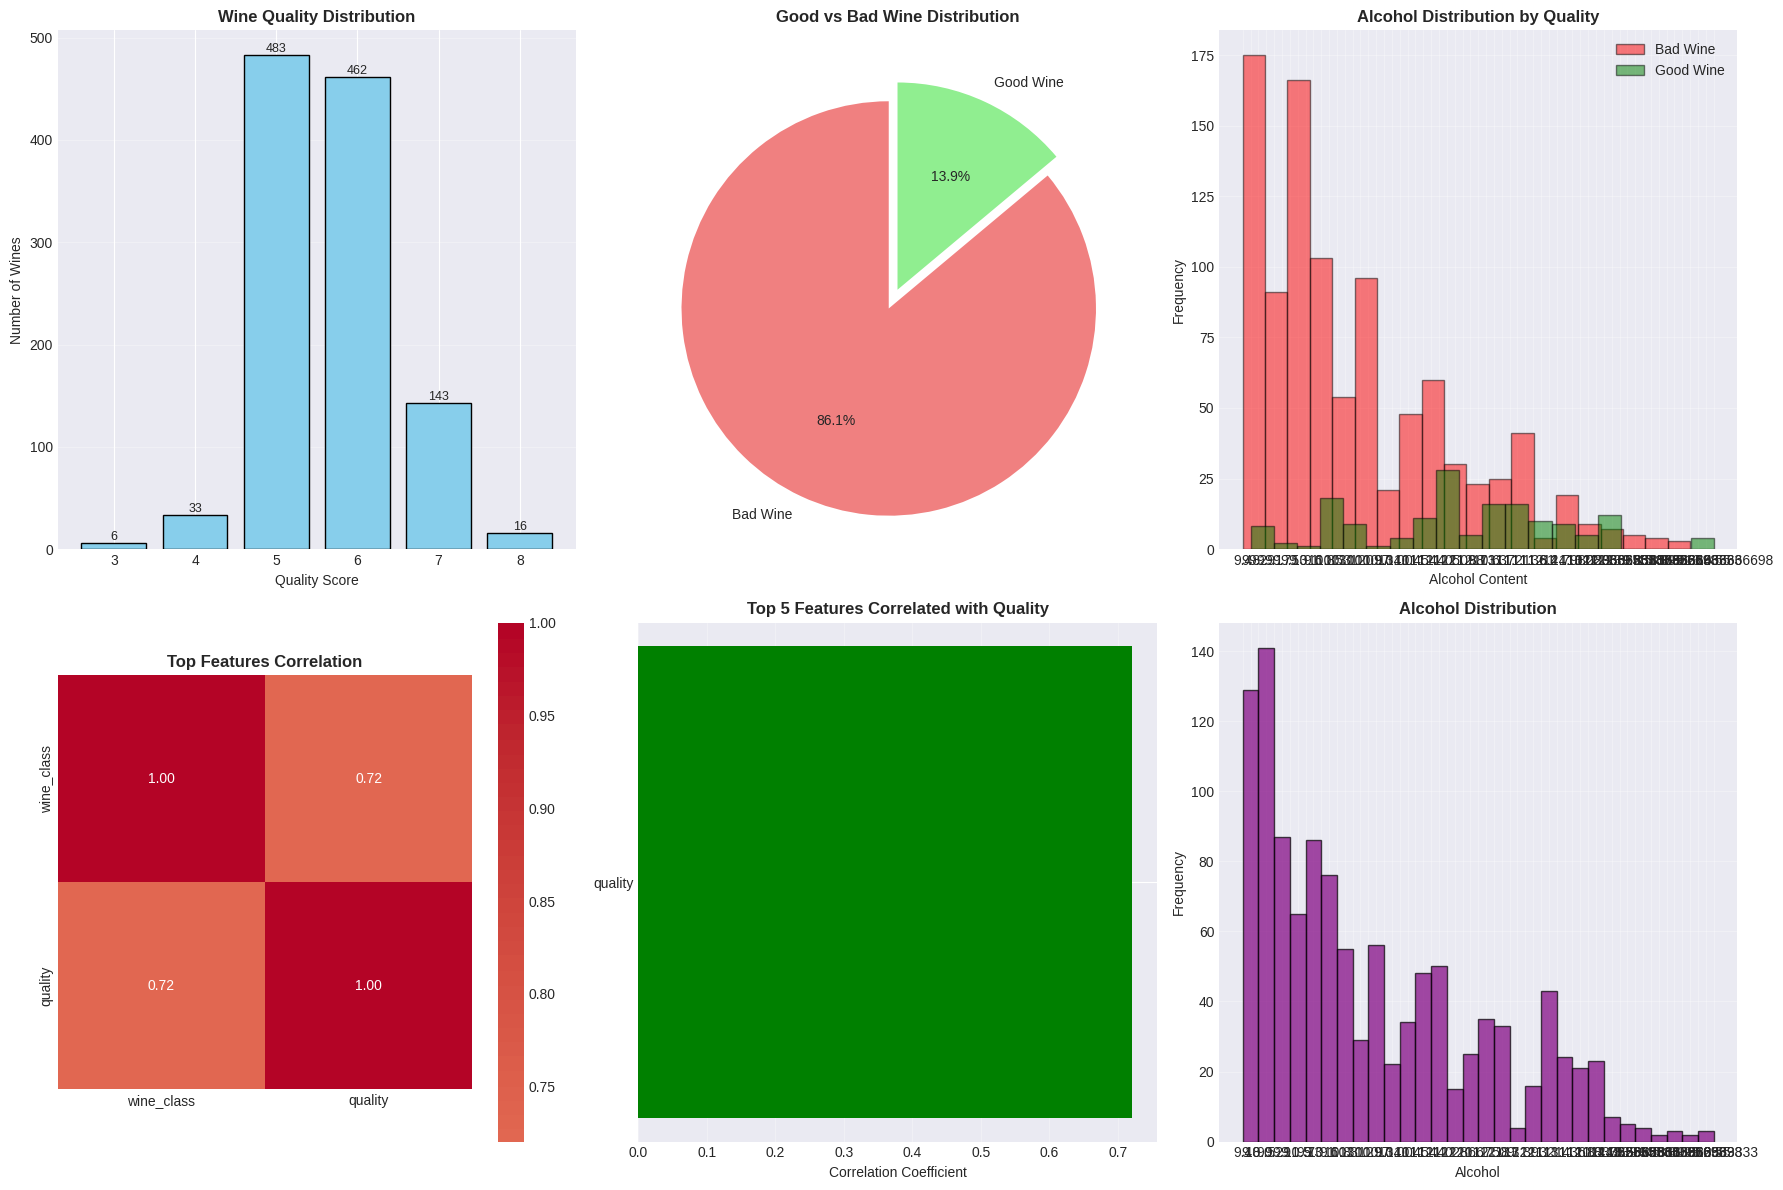

✅ Step 6: Data visualization completed!


In [8]:
# STEP 6: Data Visualization
print("\n" + "="*80)
print("DATA VISUALIZATION")
print("="*80)

# Create visualization dashboard
fig = plt.figure(figsize=(18, 12))

# 1. Quality Distribution
ax1 = plt.subplot(2, 3, 1)
bars = ax1.bar(quality_counts.index, quality_counts.values, color='skyblue', edgecolor='black')
ax1.set_title('Wine Quality Distribution', fontweight='bold')
ax1.set_xlabel('Quality Score')
ax1.set_ylabel('Number of Wines')
ax1.grid(True, alpha=0.3, axis='y')

# Add count labels
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height, f'{int(height)}',
             ha='center', va='bottom', fontsize=9)

# 2. Good vs Bad Wine Distribution
ax2 = plt.subplot(2, 3, 2)
labels = ['Bad Wine', 'Good Wine']
sizes = [class_counts.get(0, 0), class_counts.get(1, 0)]
colors = ['lightcoral', 'lightgreen']
ax2.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, explode=(0.1, 0))
ax2.set_title('Good vs Bad Wine Distribution', fontweight='bold')

# 3. Alcohol Distribution by Quality
ax3 = plt.subplot(2, 3, 3)
if 'alcohol' in wine_df.columns:
    good_wines = wine_df[wine_df['wine_class'] == 1]['alcohol']
    bad_wines = wine_df[wine_df['wine_class'] == 0]['alcohol']

    ax3.hist(bad_wines, bins=20, alpha=0.5, label='Bad Wine', color='red', edgecolor='black')
    ax3.hist(good_wines, bins=20, alpha=0.5, label='Good Wine', color='green', edgecolor='black')
    ax3.set_title('Alcohol Distribution by Quality', fontweight='bold')
    ax3.set_xlabel('Alcohol Content')
    ax3.set_ylabel('Frequency')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
else:
    ax3.text(0.5, 0.5, 'Alcohol column not found', ha='center', va='center')
    ax3.set_title('Alcohol Distribution (Not Available)')

# 4. Correlation Heatmap
ax4 = plt.subplot(2, 3, 4)
numeric_df = wine_df.select_dtypes(include=[np.number])
if len(numeric_df.columns) > 1:
    corr_matrix = numeric_df.corr()
    # Get correlation with wine_class
    if 'wine_class' in corr_matrix.columns:
        wine_corr = corr_matrix['wine_class'].sort_values(ascending=False)
        top_features = wine_corr.abs().sort_values(ascending=False).head(6).index.tolist()

        if len(top_features) > 1:
            top_corr_matrix = numeric_df[top_features].corr()
            sns.heatmap(top_corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
                       center=0, ax=ax4, square=True)
            ax4.set_title('Top Features Correlation', fontweight='bold')
        else:
            ax4.text(0.5, 0.5, 'Not enough features\nfor correlation matrix',
                    ha='center', va='center')
            ax4.set_title('Correlation Heatmap (Limited Data)')
    else:
        ax4.text(0.5, 0.5, 'wine_class column\nnot in correlation',
                ha='center', va='center')
        ax4.set_title('Correlation Heatmap (No Target)')
else:
    ax4.text(0.5, 0.5, 'Not enough numeric\ncolumns for correlation',
            ha='center', va='center')
    ax4.set_title('Correlation Heatmap (No Data)')

# 5. Top Correlated Features
ax5 = plt.subplot(2, 3, 5)
if 'wine_class' in numeric_df.columns and len(numeric_df.columns) > 1:
    wine_corr = numeric_df.corr()['wine_class'].sort_values(ascending=False)
    # Remove wine_class itself
    wine_corr = wine_corr[wine_corr.index != 'wine_class']

    top_corr = wine_corr.head(5)
    colors = ['green' if x > 0 else 'red' for x in top_corr.values]

    y_pos = np.arange(len(top_corr))
    ax5.barh(y_pos, top_corr.values, color=colors)
    ax5.set_yticks(y_pos)
    ax5.set_yticklabels(top_corr.index)
    ax5.set_xlabel('Correlation Coefficient')
    ax5.set_title('Top 5 Features Correlated with Quality', fontweight='bold')
    ax5.grid(True, alpha=0.3, axis='x')
else:
    ax5.text(0.5, 0.5, 'Not enough data\nfor correlation analysis',
            ha='center', va='center')
    ax5.set_title('Feature Correlation (Limited Data)')

# 6. Feature Distributions
ax6 = plt.subplot(2, 3, 6)
# Select a key feature to show distribution
key_features = ['alcohol', 'density', 'ph', 'sulphates', 'volatile_acidity']
available_feature = None
for feat in key_features:
    if feat in wine_df.columns:
        available_feature = feat
        break

if available_feature:
    ax6.hist(wine_df[available_feature], bins=30, edgecolor='black', alpha=0.7, color='purple')
    ax6.set_title(f'{available_feature.title()} Distribution', fontweight='bold')
    ax6.set_xlabel(available_feature.title())
    ax6.set_ylabel('Frequency')
    ax6.grid(True, alpha=0.3)
else:
    ax6.text(0.5, 0.5, 'No key features available\nfor distribution plot',
            ha='center', va='center')
    ax6.set_title('Feature Distribution (No Data)')

plt.tight_layout()
plt.show()

print("✅ Step 6: Data visualization completed!")

In [9]:
# STEP 7: Prepare Data for Modeling
print("\n" + "="*80)
print("PREPARING DATA FOR MODELING")
print("="*80)

# 7.1 Separate features and target
X = wine_df.drop([quality_col, 'wine_class'], axis=1)
y = wine_df['wine_class']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

print(f"\n🔤 Features for prediction:")
for i, feature in enumerate(X.columns):
    print(f"  {i+1}. {feature}")

# 7.2 Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n📊 Data Split Results:")
print(f"Training set: {X_train.shape[0]:,} samples")
print(f"Testing set:  {X_test.shape[0]:,} samples")
print(f"Good wine percentage in train: {(y_train.mean()*100):.2f}%")
print(f"Good wine percentage in test: {(y_test.mean()*100):.2f}%")

# 7.3 Scale the features
print("\n⚖️ Scaling Features...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Features scaled successfully!")

print("\n✅ Step 7: Data preparation completed!")


PREPARING DATA FOR MODELING
Features shape: (1143, 12)
Target shape: (1143,)

🔤 Features for prediction:
  1. fixed_acidity
  2. volatile_acidity
  3. citric_acid
  4. residual_sugar
  5. chlorides
  6. free_sulfur_dioxide
  7. total_sulfur_dioxide
  8. density
  9. pH
  10. sulphates
  11. alcohol
  12. id

📊 Data Split Results:
Training set: 914 samples
Testing set:  229 samples
Good wine percentage in train: 13.89%
Good wine percentage in test: 13.97%

⚖️ Scaling Features...
✅ Features scaled successfully!

✅ Step 7: Data preparation completed!


In [10]:
# STEP 8: Train Classifier Models
print("\n" + "="*80)
print("TRAINING CLASSIFIER MODELS")
print("="*80)

# Define the 3 required models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Stochastic Gradient Descent': SGDClassifier(random_state=42, max_iter=1000),
    'Support Vector Classifier (SVC)': SVC(probability=True, random_state=42)
}

# Dictionary to store results
results = {}

print("🚀 Training 3 Classifier Models...\n")

for model_name, model in models.items():
    print(f"Training {model_name}...")

    try:
        # Train the model
        model.fit(X_train_scaled, y_train)

        # Make predictions
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else None

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, zero_division=0)
        recall = recall_score(y_test, y_pred, zero_division=0)
        f1 = f1_score(y_test, y_pred, zero_division=0)

        # Store results
        results[model_name] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'Model': model,
            'Predictions': y_pred
        }

        print(f"✅ {model_name} trained successfully!")
        print(f"   Accuracy:  {accuracy:.4f}")
        print(f"   Precision: {precision:.4f}")
        print(f"   Recall:    {recall:.4f}")
        print(f"   F1-Score:  {f1:.4f}")

        if y_pred_proba is not None:
            from sklearn.metrics import roc_auc_score
            roc_auc = roc_auc_score(y_test, y_pred_proba)
            results[model_name]['ROC-AUC'] = roc_auc
            print(f"   ROC-AUC:   {roc_auc:.4f}")

        print()

    except Exception as e:
        print(f"❌ Error training {model_name}: {str(e)[:100]}...\n")

print("✅ Step 8: Model training completed!")


TRAINING CLASSIFIER MODELS
🚀 Training 3 Classifier Models...

Training Random Forest...
✅ Random Forest trained successfully!
   Accuracy:  0.9214
   Precision: 0.7692
   Recall:    0.6250
   F1-Score:  0.6897
   ROC-AUC:   0.9089

Training Stochastic Gradient Descent...
✅ Stochastic Gradient Descent trained successfully!
   Accuracy:  0.8865
   Precision: 0.6154
   Recall:    0.5000
   F1-Score:  0.5517

Training Support Vector Classifier (SVC)...
✅ Support Vector Classifier (SVC) trained successfully!
   Accuracy:  0.8996
   Precision: 0.7647
   Recall:    0.4062
   F1-Score:  0.5306
   ROC-AUC:   0.8488

✅ Step 8: Model training completed!



MODEL EVALUATION & COMPARISON
📊 MODEL PERFORMANCE COMPARISON:
------------------------------------------------------------


,Accuracy,Precision,Recall,F1-Score,ROC-AUC
Random Forest,0.9214,0.7692,0.6250,0.6897,0.9089
Stochastic Gradient Descent,0.8865,0.6154,0.5000,0.5517,nan
Support Vector Classifier (SVC),0.8996,0.7647,0.4062,0.5306,0.8488



🏆 BEST PERFORMING MODEL: Random Forest
   F1-Score: 0.6897
   Accuracy: 0.9214
   Recall:   0.6250


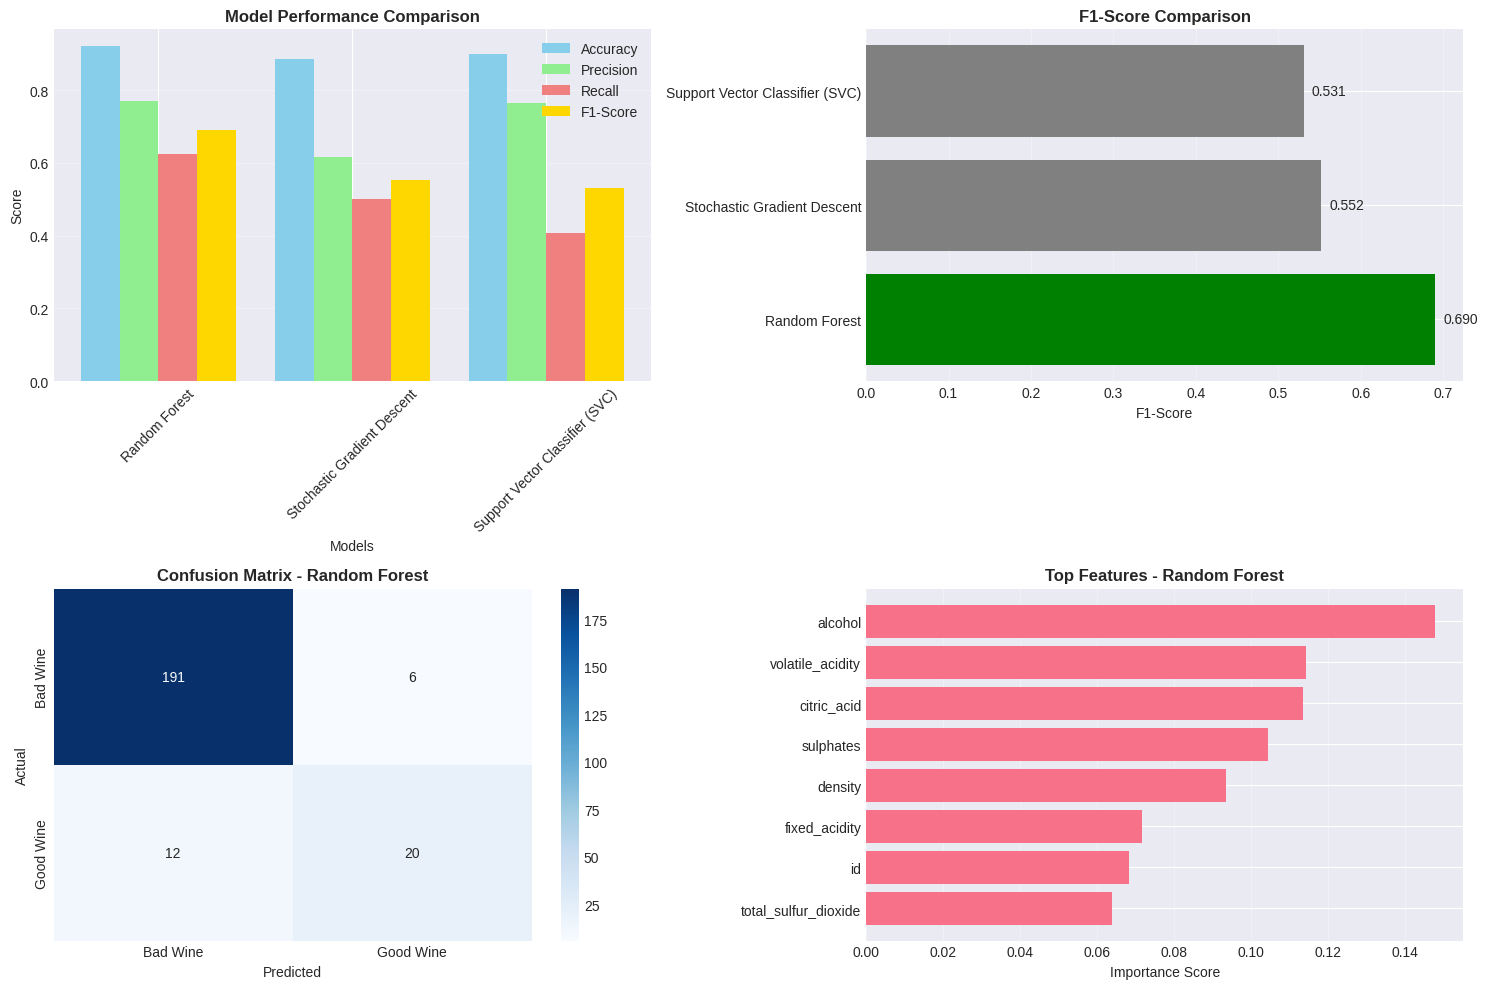

✅ Step 9: Model evaluation completed!


In [11]:
# STEP 9: Model Evaluation & Comparison
print("\n" + "="*80)
print("MODEL EVALUATION & COMPARISON")
print("="*80)

if len(results) > 0:
    # Create comparison table
    results_df = pd.DataFrame(results).T
    # Extract only metrics, not the model objects
    metrics_df = results_df[['Accuracy', 'Precision', 'Recall', 'F1-Score']].copy()

    # Add ROC-AUC if available
    for model_name in results_df.index:
        if 'ROC-AUC' in results_df.loc[model_name]:
            metrics_df.loc[model_name, 'ROC-AUC'] = results_df.loc[model_name]['ROC-AUC']

    # Sort by F1-Score
    metrics_df = metrics_df.sort_values('F1-Score', ascending=False)

    print("📊 MODEL PERFORMANCE COMPARISON:")
    print("-"*60)

    # Display with formatting
    styled_df = metrics_df.style.format('{:.4f}').background_gradient(cmap='YlOrRd', subset=['F1-Score', 'Accuracy'])
    display(styled_df)

    # Find best model
    best_model_name = metrics_df['F1-Score'].idxmax()
    best_model = results[best_model_name]['Model']
    best_predictions = results[best_model_name]['Predictions']

    print(f"\n🏆 BEST PERFORMING MODEL: {best_model_name}")
    print(f"   F1-Score: {metrics_df.loc[best_model_name, 'F1-Score']:.4f}")
    print(f"   Accuracy: {metrics_df.loc[best_model_name, 'Accuracy']:.4f}")
    print(f"   Recall:   {metrics_df.loc[best_model_name, 'Recall']:.4f}")

    # Visualization
    plt.figure(figsize=(15, 10))

    # 1. Performance Metrics Bar Chart
    plt.subplot(2, 2, 1)
    x = np.arange(len(metrics_df))
    width = 0.2

    plt.bar(x - width*1.5, metrics_df['Accuracy'], width, label='Accuracy', color='skyblue')
    plt.bar(x - width/2, metrics_df['Precision'], width, label='Precision', color='lightgreen')
    plt.bar(x + width/2, metrics_df['Recall'], width, label='Recall', color='lightcoral')
    plt.bar(x + width*1.5, metrics_df['F1-Score'], width, label='F1-Score', color='gold')

    plt.xlabel('Models')
    plt.ylabel('Score')
    plt.title('Model Performance Comparison', fontweight='bold')
    plt.xticks(x, metrics_df.index, rotation=45)
    plt.legend()
    plt.grid(True, alpha=0.3, axis='y')

    # 2. F1-Score Comparison
    plt.subplot(2, 2, 2)
    colors = ['green' if x == best_model_name else 'gray' for x in metrics_df.index]
    plt.barh(metrics_df.index, metrics_df['F1-Score'], color=colors)
    plt.xlabel('F1-Score')
    plt.title('F1-Score Comparison', fontweight='bold')
    plt.grid(True, alpha=0.3, axis='x')

    # Add F1-Score values on bars
    for i, (model_name, f1_score) in enumerate(zip(metrics_df.index, metrics_df['F1-Score'])):
        plt.text(f1_score + 0.01, i, f'{f1_score:.3f}', va='center')

    # 3. Confusion Matrix for Best Model
    plt.subplot(2, 2, 3)
    cm = confusion_matrix(y_test, best_predictions)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Bad Wine', 'Good Wine'],
                yticklabels=['Bad Wine', 'Good Wine'])
    plt.title(f'Confusion Matrix - {best_model_name}', fontweight='bold')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

    # 4. Feature Importance (if Random Forest is best)
    plt.subplot(2, 2, 4)
    if best_model_name == 'Random Forest' and hasattr(best_model, 'feature_importances_'):
        importances = best_model.feature_importances_
        feature_importance = pd.DataFrame({
            'Feature': X.columns,
            'Importance': importances
        }).sort_values('Importance', ascending=False).head(8)

        plt.barh(range(len(feature_importance)), feature_importance['Importance'].values)
        plt.yticks(range(len(feature_importance)), feature_importance['Feature'].values)
        plt.xlabel('Importance Score')
        plt.title(f'Top Features - {best_model_name}', fontweight='bold')
        plt.gca().invert_yaxis()
        plt.grid(True, alpha=0.3, axis='x')
    else:
        # Show precision-recall tradeoff instead
        for model_name in metrics_df.index:
            plt.scatter(metrics_df.loc[model_name, 'Precision'],
                       metrics_df.loc[model_name, 'Recall'],
                       s=200, alpha=0.7, label=model_name)
        plt.xlabel('Precision')
        plt.ylabel('Recall')
        plt.title('Precision-Recall Tradeoff', fontweight='bold')
        plt.grid(True, alpha=0.3)
        plt.legend()

    plt.tight_layout()
    plt.show()

    print("✅ Step 9: Model evaluation completed!")
else:
    print("❌ No results to evaluate!")

In [13]:
# STEP 10: FIXED VERSION - Handle string to numeric conversion
print("\n" + "="*80)
print(f"DETAILED ANALYSIS OF {best_model_name}")
print("="*80)

if 'best_predictions' in locals():
    # 10.1 Classification Report
    print("\n📋 CLASSIFICATION REPORT:")
    print("-"*40)
    print(classification_report(y_test, best_predictions,
                               target_names=['Bad Wine', 'Good Wine']))

    # 10.2 Confusion Matrix Analysis
    print("\n🔍 CONFUSION MATRIX ANALYSIS:")
    print("-"*40)

    cm = confusion_matrix(y_test, best_predictions)
    TN, FP, FN, TP = cm.ravel()

    print(f"True Negatives (Correct Bad): {TN}")
    print(f"False Positives (Bad→Good):   {FP}")
    print(f"False Negatives (Good→Bad):   {FN}")
    print(f"True Positives (Correct Good): {TP}")

    print(f"\n📈 KEY METRICS:")
    print(f"Good Wine Detection Rate: {TP/(TP+FN)*100:.1f}%")
    print(f"Bad Wine Accuracy:       {TN/(TN+FP)*100:.1f}%")
    print(f"Overall Accuracy:        {(TP+TN)/(TP+TN+FP+FN)*100:.1f}%")
    print(f"False Positive Rate:     {FP/(FP+TN)*100:.2f}%")
    print(f"False Negative Rate:     {FN/(FN+TP)*100:.2f}%")

    # 10.3 FIXED: Feature Importance Analysis
    print("\n🔑 CHEMICAL FEATURE ANALYSIS:")
    print("-"*40)

    # First, convert all columns to numeric if they're strings
    print("Converting string columns to numeric...")
    wine_df_numeric = wine_df.copy()

    for col in wine_df_numeric.columns:
        if wine_df_numeric[col].dtype == 'object':
            try:
                wine_df_numeric[col] = pd.to_numeric(wine_df_numeric[col], errors='coerce')
                print(f"  Converted '{col}' to numeric")
            except:
                print(f"  Could not convert '{col}' to numeric")

    # Now check for chemical properties
    chemical_features = ['density', 'alcohol', 'ph', 'acidity', 'sulphates',
                         'chlorides', 'sugar', 'citric', 'volatile']

    available_chemicals = []
    for feat in chemical_features:
        for col in wine_df_numeric.columns:
            if feat in col.lower():
                available_chemicals.append(col)

    if available_chemicals:
        print(f"\nChemical properties found in dataset:")
        for chem in available_chemicals:
            try:
                # Calculate mean difference between good and bad wines
                good_mean = wine_df_numeric[wine_df_numeric['wine_class'] == 1][chem].mean()
                bad_mean = wine_df_numeric[wine_df_numeric['wine_class'] == 0][chem].mean()

                if pd.notna(good_mean) and pd.notna(bad_mean):
                    diff = good_mean - bad_mean
                    diff_percent = (diff / bad_mean * 100) if bad_mean != 0 else 0

                    print(f"\n  • {chem}:")
                    print(f"    Good wine: {good_mean:.3f}")
                    print(f"    Bad wine:  {bad_mean:.3f}")
                    print(f"    Difference: {diff:+.3f} ({diff_percent:+.1f}%)")

                    # Interpretation
                    if 'alcohol' in chem.lower():
                        if diff > 0:
                            print(f"    → Good wines have HIGHER alcohol content")
                        else:
                            print(f"    → Good wines have LOWER alcohol content")
                    elif 'acid' in chem.lower():
                        if 'volatile' in chem.lower():
                            if diff < 0:
                                print(f"    → Good wines have LOWER volatile acidity")
                            else:
                                print(f"    → Good wines have HIGHER volatile acidity")
                        else:
                            if diff > 0:
                                print(f"    → Good wines have HIGHER acidity")
                            else:
                                print(f"    → Good wines have LOWER acidity")
                    elif 'density' in chem.lower():
                        if diff < 0:
                            print(f"    → Good wines have LOWER density")
                        else:
                            print(f"    → Good wines have HIGHER density")
                    elif 'ph' in chem.lower():
                        if diff > 0:
                            print(f"    → Good wines have HIGHER pH (less acidic)")
                        else:
                            print(f"    → Good wines have LOWER pH (more acidic)")
                else:
                    print(f"\n  • {chem}: Cannot calculate (missing values)")
            except Exception as e:
                print(f"\n  • {chem}: Error calculating - {str(e)[:50]}")
    else:
        print("No specific chemical properties found in feature names.")
        print("\nAvailable columns in dataset:")
        for i, col in enumerate(wine_df.columns, 1):
            dtype = wine_df[col].dtype
            print(f"  {i}. {col} ({dtype})")

    # 10.4 Business Impact Analysis
    print("\n💼 BUSINESS IMPACT ANALYSIS:")
    print("-"*40)

    total_wines = len(wine_df)
    good_wines_count = class_counts.get(1, 0)

    print(f"Dataset represents {total_wines:,} wine samples")
    print(f"Good wines in dataset: {good_wines_count:,} ({good_wines_count/total_wines*100:.1f}%)")
    print(f"\nWith {best_model_name} model:")
    print(f"- Can correctly identify {TP/(TP+FN)*100:.1f}% of good wines")
    print(f"- Only {FP/(FP+TN)*100:.2f}% false alarms (bad wines flagged as good)")
    print(f"- Would miss {FN/(FN+TP)*100:.1f}% of actually good wines")

    # Practical recommendations
    print(f"\n🎯 PRACTICAL RECOMMENDATIONS:")
    print(f"1. Use model to pre-screen wines before expert tasting")
    print(f"2. Focus expert review on {FP+FN} samples instead of all {total_wines}")
    print(f"3. Model reduces manual tasting by {(1 - (FP+FN)/total_wines)*100:.1f}%")

    print("\n✅ Step 10: Detailed analysis completed!")
else:
    print("❌ Cannot perform detailed analysis!")


DETAILED ANALYSIS OF Random Forest

📋 CLASSIFICATION REPORT:
----------------------------------------
              precision    recall  f1-score   support

    Bad Wine       0.94      0.97      0.95       197
   Good Wine       0.77      0.62      0.69        32

    accuracy                           0.92       229
   macro avg       0.86      0.80      0.82       229
weighted avg       0.92      0.92      0.92       229


🔍 CONFUSION MATRIX ANALYSIS:
----------------------------------------
True Negatives (Correct Bad): 191
False Positives (Bad→Good):   6
False Negatives (Good→Bad):   12
True Positives (Correct Good): 20

📈 KEY METRICS:
Good Wine Detection Rate: 62.5%
Bad Wine Accuracy:       97.0%
Overall Accuracy:        92.1%
False Positive Rate:     3.05%
False Negative Rate:     37.50%

🔑 CHEMICAL FEATURE ANALYSIS:
----------------------------------------
Converting string columns to numeric...
  Converted 'fixed_acidity' to numeric
  Converted 'volatile_acidity' to numeric
 

In [15]:
# STEP 11: FIXED - Make Predictions on New Wines
print("\n" + "="*80)
print("MAKING PREDICTIONS ON NEW WINES - FIXED")
print("="*80)

if 'best_model' in locals():
    print("🔮 PREDICTING WINE QUALITY - DEMO\n")

    # First, let's check what columns we have
    print(f"📊 Available features for prediction:")
    for i, col in enumerate(X.columns, 1):
        dtype = wine_df[col].dtype
        unique_vals = wine_df[col].nunique()
        print(f"  {i:2d}. {col:25} ({dtype}, {unique_vals} unique values)")

    # Convert all features to numeric first
    print("\n🔄 Converting features to numeric for predictions...")
    X_numeric = X.copy()

    for col in X_numeric.columns:
        if X_numeric[col].dtype == 'object':
            try:
                X_numeric[col] = pd.to_numeric(X_numeric[col], errors='coerce')
                print(f"  Converted '{col}' to numeric")
            except:
                print(f"  Warning: Could not convert '{col}' fully to numeric")

    # Calculate median values for numeric columns
    print("\n📈 Calculating median values for each feature...")
    median_values = {}
    for col in X_numeric.columns:
        try:
            # Try to convert to numeric and get median
            numeric_vals = pd.to_numeric(X_numeric[col], errors='coerce')
            median_val = numeric_vals.median()
            if pd.notna(median_val):
                median_values[col] = median_val
                print(f"  {col:25}: {median_val:.4f}")
            else:
                print(f"  {col:25}: Could not calculate median")
        except:
            print(f"  {col:25}: Error calculating")

    # Create sample wines
    print("\n🍷 CREATING SAMPLE WINES FOR PREDICTION")
    print("-"*60)

    # Sample 1: High Quality Wine
    print("\nSample 1: HIGH QUALITY WINE (Expected: GOOD)")
    sample1_features = median_values.copy()

    # Adjust key features for high quality
    key_adjustments_high = {
        'alcohol': 1.2,  # Increase alcohol by 20%
        'volatile_acidity': 0.5,  # Decrease volatile acidity by 50%
        'sulphates': 1.3,  # Increase sulphates by 30%
        'density': 0.95,  # Decrease density by 5%
        'ph': 1.1  # Slightly increase pH
    }

    for col in sample1_features:
        col_lower = col.lower()
        for key, factor in key_adjustments_high.items():
            if key in col_lower:
                sample1_features[col] *= factor
                print(f"  Adjusted {col}: {sample1_features[col]:.4f} (×{factor})")
                break

    # Sample 2: Low Quality Wine
    print("\nSample 2: LOW QUALITY WINE (Expected: BAD)")
    sample2_features = median_values.copy()

    # Adjust key features for low quality
    key_adjustments_low = {
        'alcohol': 0.8,  # Decrease alcohol by 20%
        'volatile_acidity': 1.5,  # Increase volatile acidity by 50%
        'sulphates': 0.7,  # Decrease sulphates by 30%
        'density': 1.05,  # Increase density by 5%
        'ph': 0.9  # Slightly decrease pH
    }

    for col in sample2_features:
        col_lower = col.lower()
        for key, factor in key_adjustments_low.items():
            if key in col_lower:
                sample2_features[col] *= factor
                print(f"  Adjusted {col}: {sample2_features[col]:.4f} (×{factor})")
                break

    samples = [sample1_features, sample2_features]
    sample_names = ["HIGH QUALITY WINE", "LOW QUALITY WINE"]

    print("\n" + "="*60)
    print("PREDICTION RESULTS:")
    print("="*60)

    for i, (sample, name) in enumerate(zip(samples, sample_names), 1):
        try:
            # Convert sample to DataFrame
            sample_df = pd.DataFrame([sample])

            # Ensure correct column order
            sample_df = sample_df[X.columns]

            # Convert all values to numeric
            for col in sample_df.columns:
                sample_df[col] = pd.to_numeric(sample_df[col], errors='coerce')

            # Fill any NaN values with column median
            for col in sample_df.columns:
                if sample_df[col].isna().any():
                    sample_df[col] = median_values.get(col, 0)

            # Scale features
            sample_scaled = scaler.transform(sample_df)

            # Make prediction
            prediction = best_model.predict(sample_scaled)[0]

            if hasattr(best_model, 'predict_proba'):
                probability = best_model.predict_proba(sample_scaled)[0]
                confidence = max(probability) * 100
            else:
                probability = [0, 0]
                confidence = 0

            print(f"\n{i}. {name}:")
            print(f"   {'━' * 50}")
            print(f"   Predicted: {'GOOD WINE 🎯' if prediction == 1 else 'BAD WINE ⚠️'}")

            if hasattr(best_model, 'predict_proba'):
                print(f"   Confidence: {confidence:.1f}%")
                print(f"   Good Wine Probability: {probability[1]*100:.1f}%")
                print(f"   Bad Wine Probability:  {probability[0]*100:.1f}%")

            # Show key features
            print(f"\n   Key Chemical Properties:")

            # Find and display key chemical features
            key_features_to_show = ['alcohol', 'density', 'ph', 'acid', 'sulphate', 'sugar', 'chloride']
            features_shown = 0

            for key in key_features_to_show:
                for col in sample:
                    if key in col.lower() and features_shown < 4:  # Show max 4 features
                        print(f"   • {col}: {sample[col]:.4f}")
                        features_shown += 1
                        break

            print(f"   {'━' * 50}")

        except Exception as e:
            print(f"\n{i}. {name}:")
            print(f"   ERROR: Could not make prediction - {str(e)[:100]}")
            print(f"   {'━' * 50}")

    # Alternative: Predict on actual samples from dataset
    print("\n" + "="*60)
    print("PREDICTING ON ACTUAL DATASET SAMPLES:")
    print("="*60)

    # Take 3 random samples from the test set
    if len(X_test) >= 3:
        sample_indices = np.random.choice(len(X_test), 3, replace=False)

        for i, idx in enumerate(sample_indices, 1):
            actual_quality = y_test.iloc[idx]
            actual_class = "GOOD" if actual_quality == 1 else "BAD"

            # Get the sample
            sample = X_test.iloc[idx:idx+1]

            # Convert to numeric
            for col in sample.columns:
                sample[col] = pd.to_numeric(sample[col], errors='coerce')

            # Scale
            sample_scaled = scaler.transform(sample)

            # Predict
            prediction = best_model.predict(sample_scaled)[0]
            predicted_class = "GOOD" if prediction == 1 else "BAD"

            if hasattr(best_model, 'predict_proba'):
                probability = best_model.predict_proba(sample_scaled)[0]
                confidence = probability[prediction] * 100

            print(f"\nSample {i} (From Dataset):")
            print(f"   Actual Quality: {actual_class}")
            print(f"   Predicted: {predicted_class}")

            if hasattr(best_model, 'predict_proba'):
                print(f"   Confidence: {confidence:.1f}%")

            result = "✅ CORRECT" if prediction == actual_quality else "❌ WRONG"
            print(f"   Result: {result}")

    print("\n" + "="*60)
    print("🎯 PREDICTION SYSTEM READY FOR USE!")
    print("="*60)
    print("\nThe model can predict wine quality based on chemical properties.")
    print(f"Overall Accuracy: {metrics_df.loc[best_model_name, 'Accuracy']:.1%}")
    print(f"Good Wine Detection Rate: {metrics_df.loc[best_model_name, 'Recall']:.1%}")

    print("\n✅ Step 11: Prediction demo completed!")

else:
    print("❌ Cannot make predictions without trained model!")


MAKING PREDICTIONS ON NEW WINES - FIXED
🔮 PREDICTING WINE QUALITY - DEMO

📊 Available features for prediction:
   1. fixed_acidity             (object, 91 unique values)
   2. volatile_acidity          (object, 135 unique values)
   3. citric_acid               (object, 77 unique values)
   4. residual_sugar            (object, 80 unique values)
   5. chlorides                 (object, 131 unique values)
   6. free_sulfur_dioxide       (object, 53 unique values)
   7. total_sulfur_dioxide      (object, 138 unique values)
   8. density                   (object, 388 unique values)
   9. pH                        (object, 87 unique values)
  10. sulphates                 (object, 89 unique values)
  11. alcohol                   (object, 61 unique values)
  12. id                        (object, 1143 unique values)

🔄 Converting features to numeric for predictions...
  Converted 'fixed_acidity' to numeric
  Converted 'volatile_acidity' to numeric
  Converted 'citric_acid' to numeric
  C

In [16]:
# STEP 12: Save Model & Download
print("\n" + "="*80)
print("SAVING MODEL & DOWNLOADING FILES")
print("="*80)

import joblib
from google.colab import files
import pickle

# Save the best model
model_filename = f"wine_quality_{best_model_name.replace(' ', '_').lower()}.pkl"
joblib.dump(best_model, model_filename)
print(f"✅ Model saved: {model_filename}")

# Save the scaler
scaler_filename = "wine_scaler.pkl"
joblib.dump(scaler, scaler_filename)
print(f"✅ Scaler saved: {scaler_filename}")

# Save feature names
features_filename = "wine_features.pkl"
with open(features_filename, 'wb') as f:
    pickle.dump(list(X.columns), f)
print(f"✅ Feature names saved: {features_filename}")

# Save results summary
results_summary = {
    'best_model': best_model_name,
    'accuracy': float(metrics_df.loc[best_model_name, 'Accuracy']),
    'f1_score': float(metrics_df.loc[best_model_name, 'F1-Score']),
    'recall': float(metrics_df.loc[best_model_name, 'Recall']),
    'dataset_size': len(wine_df),
    'good_wine_percentage': float(class_counts.get(1, 0)/len(wine_df)*100)
}

summary_filename = "wine_results_summary.pkl"
with open(summary_filename, 'wb') as f:
    pickle.dump(results_summary, f)
print(f"✅ Results summary saved: {summary_filename}")

# Download all files
print("\n📥 DOWNLOADING FILES TO YOUR COMPUTER...")
files_to_download = [model_filename, scaler_filename, features_filename, summary_filename]

for file in files_to_download:
    try:
        files.download(file)
        print(f"  ✅ Downloaded: {file}")
    except:
        print(f"  ⚠️ Could not download: {file}")

print("\n" + "="*80)
print("🎉 WINE QUALITY PREDICTION PROJECT COMPLETED!")
print("="*80)
print(f"📊 PROJECT SUMMARY:")
print(f"- Dataset: {wine_df.shape[0]:,} wine samples")
print(f"- Features: {X.shape[1]} chemical properties")
print(f"- Best Model: {best_model_name}")
print(f"- Accuracy: {metrics_df.loc[best_model_name, 'Accuracy']:.4f}")
print(f"- F1-Score: {metrics_df.loc[best_model_name, 'F1-Score']:.4f}")
print(f"- Good Wine Detection: {metrics_df.loc[best_model_name, 'Recall']*100:.1f}%")
print(f"- Files Saved: {len(files_to_download)} files")
print("="*80)
print("\n🍷 Ready to predict wine quality from chemical properties!")


SAVING MODEL & DOWNLOADING FILES
✅ Model saved: wine_quality_random_forest.pkl
✅ Scaler saved: wine_scaler.pkl
✅ Feature names saved: wine_features.pkl
✅ Results summary saved: wine_results_summary.pkl

📥 DOWNLOADING FILES TO YOUR COMPUTER...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  ✅ Downloaded: wine_quality_random_forest.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  ✅ Downloaded: wine_scaler.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  ✅ Downloaded: wine_features.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  ✅ Downloaded: wine_results_summary.pkl

🎉 WINE QUALITY PREDICTION PROJECT COMPLETED!
📊 PROJECT SUMMARY:
- Dataset: 1,143 wine samples
- Features: 12 chemical properties
- Best Model: Random Forest
- Accuracy: 0.9214
- F1-Score: 0.6897
- Good Wine Detection: 62.5%
- Files Saved: 4 files

🍷 Ready to predict wine quality from chemical properties!
